In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
df = pd.read_csv('airflow/data/final_data.csv')

# Looking at the correlation between the movie rating and the number of votes
Using the corr() function on the DataFrame is the easiest way to find the correlation between features with numeric values. Try to work on a copy of the original dataset. We don't want to mess with the original dataset!

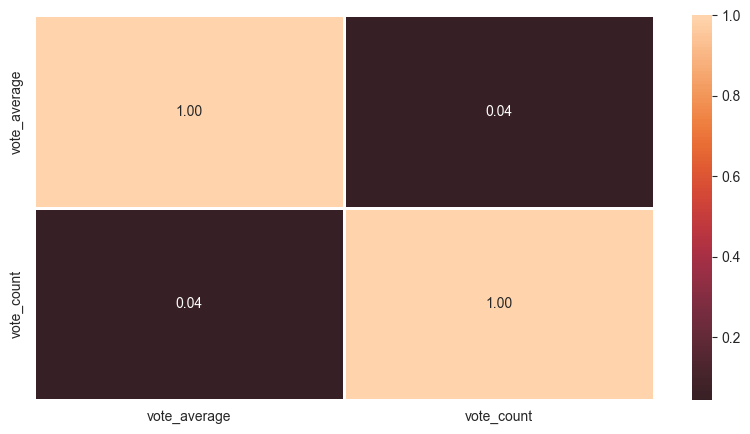

In [118]:
#visualization using heatmap
plt.subplots(figsize = (10,5))
sns.heatmap (df.corr(), annot = True,linewidths =0.75,linecolor = "White",fmt = ".2f",center = -0.1)
plt.show()

Poor correlation between movie rating and numer of votes.


# Finding the number of movie types in all years using the Bar chart
Let us look at the frequency of movie genres throughout the years using the Bar chart from Matplotlib.

The column “genre” in the original DataFrame has String values. But if we look at the string carefully, we realize that it is an array of JSON objects. So I will be using the json library to convert this string into the array. Thus, I will separate the genre names from the string.

After that, the rest of the code is easy to understand

In [119]:
from collections import Counter
genre_count_dict=Counter(df["genre"])

In [120]:
newDict={}
for (key, value) in genre_count_dict.items():
    # Check if key is even then add pair to new dictionary
    if value >= 50 :
        newDict[key] = value

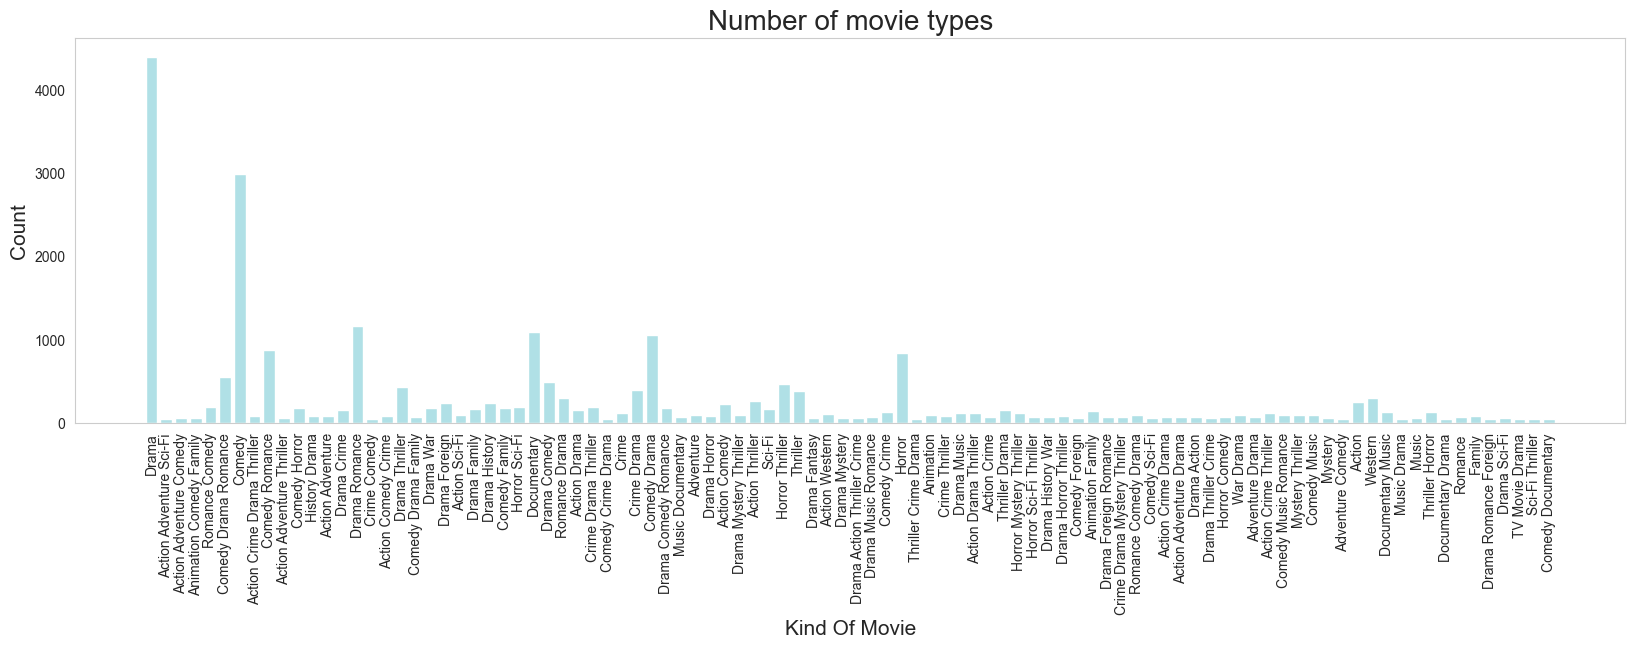

In [121]:
genre_name = []
genre_count = []
for genre in newDict:
    genre_name.append(genre)  #putting genres into array
    genre_count.append(newDict[genre])  #putting the frequency into array
#visualization using bar graph
plt.figure(figsize=(20, 5))
plt.bar(genre_name, genre_count, color='powderblue')
plt.xticks(rotation=90)
plt.xlabel("Kind Of Movie", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Number of movie types", fontsize=20)
plt.grid()
plt.show()

# Comparing Movie incomes and their expenses using the Barplot
Top 20 movies ranked by rating. We can use Barplot from the Seaborn library to visualize this.

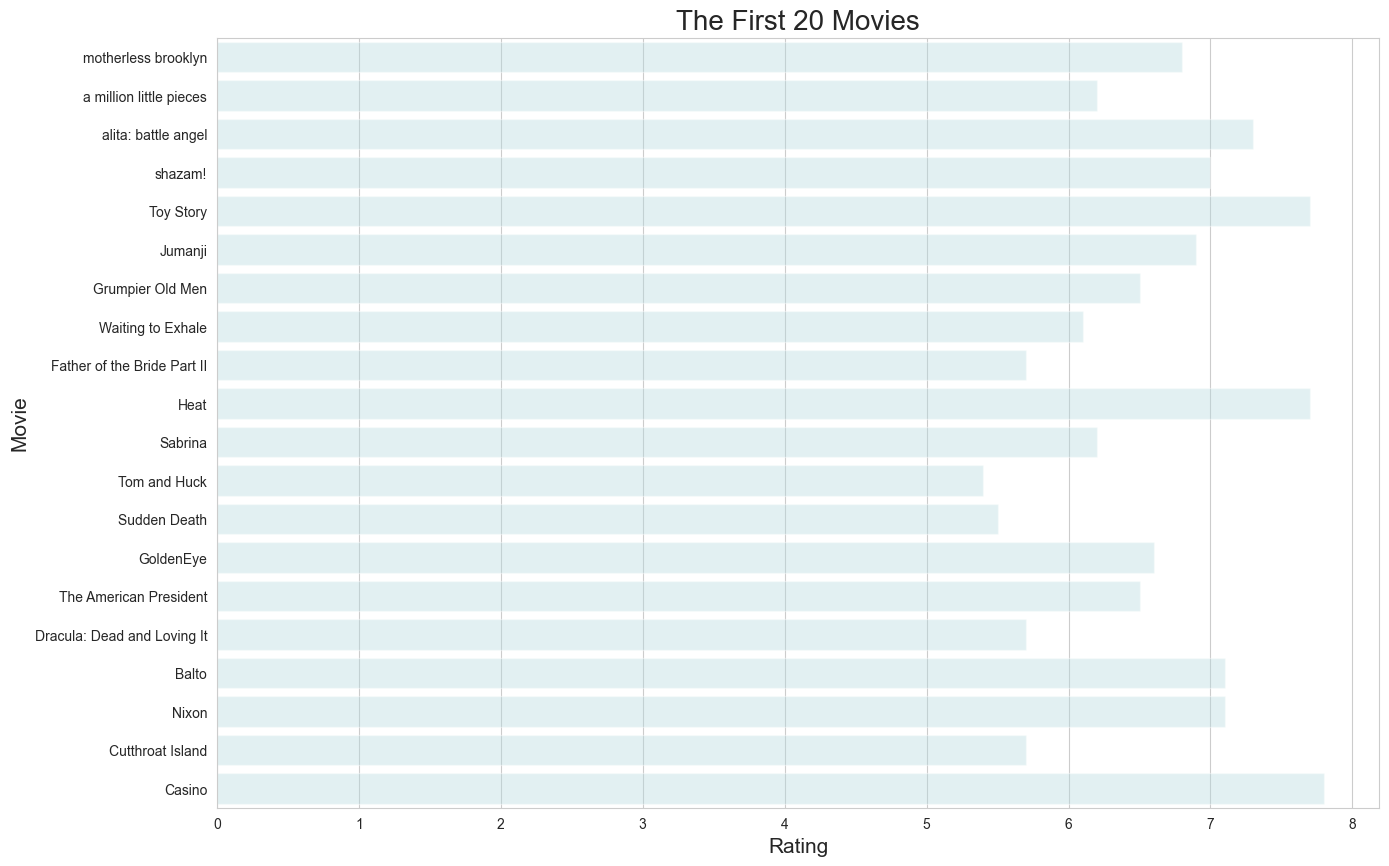

In [162]:
#visualization with barplot
plt.figure(figsize = (15,10))
sns.barplot(x = "vote_average",y= "title", data=  df.head(20),color="powderblue",alpha=0.4,label="Vote_average")

plt.xlabel("Rating",fontsize= 15)
plt.ylabel("Movie",fontsize= 15)
plt.title("The First 20 Movies",fontsize = 20)
plt.show()

In [122]:
#visualization of popularity v/s votes through regression plot
df['release_date']=pd.to_datetime(df['release_date'])
df1 = pd.concat([pd.Series(row['release_date'].year, row['genre'].split(' '))
                 for _, row in df[df["release_date"].dt.year>1990][["release_date","genre"]].iterrows()]).reset_index()

In [123]:
df1.columns = ["genres","year"]

In [124]:
df1["genres"] = df1["genres"].apply(lambda x: x.strip())


!pip install wordcloud

In [125]:
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
from bokeh.plotting import figure, output_file, show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LinearColorMapper,
    BasicTicker, LogTicker, ContinuousTicker, AdaptiveTicker,
    PrintfTickFormatter,
    ColorBar,
    FactorRange
)
import bokeh.palettes
from bokeh.transform import factor_cmap
from wordcloud import WordCloud, STOPWORDS
from math import floor
from bokeh.io import output_notebook
from bokeh.models import NumeralTickFormatter
from bokeh.resources import CDN
from bokeh.embed import file_html



# Which genres of movies are most prevalent?
 The word cloud below displays the most frequent genres of movies across our data set, and we can see that movies of the genres ‘Drama’ and ‘Comedy’ were most prevalent over the years. This means that although ‘Adventure’ and ‘Family’ are more profitable as of late, it is not solely because these genres have the most amount of movies.

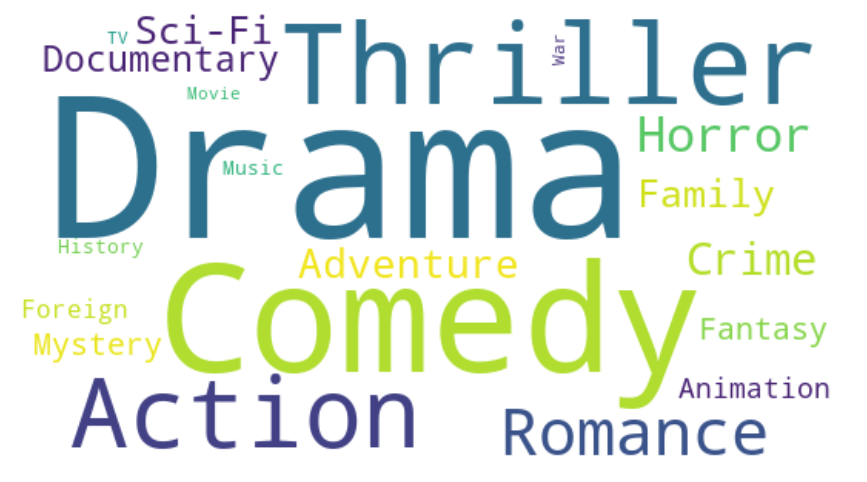

In [126]:
words = dict()
trunc_occurences = df1.groupby(["genres"]).size().sort_values(ascending=False).reset_index()
trunc_occurences.columns = ["genres", "frequency"]
for i in range(20):
    words[trunc_occurences["genres"][i]] = trunc_occurences["frequency"][i]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='white',
                      max_words=1628,relative_scaling=0.7,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Outliers

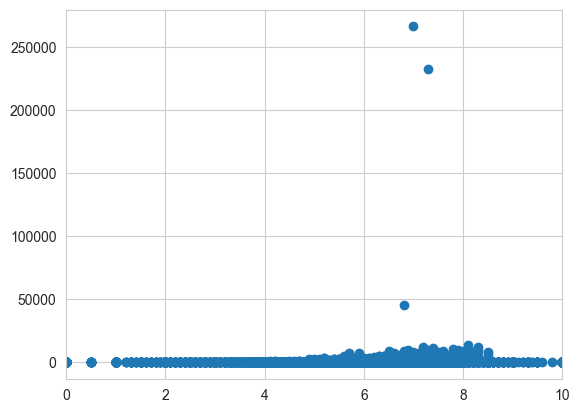

In [127]:
plt.scatter(df["vote_average"],df["vote_count"])
plt.xlim([0,10])
plt.show()

In [128]:
def extract_decade(x):
    return str(floor(x/10)*10)+"s"

In [129]:
df["decade"] = df["release_date"].dt.year.apply(extract_decade)

# How has the number of votes and distribution of average movie rating changed over time?
The following two plots highlight how the number of votes given to a movie has increased drastically from the 20th century to 21st century because of the increased ease of voting due to internet facilities. Additionally, it is important to notice that people have become more critical recently with the vote average constantly decreasing in each decade. We believe that this is due to people comparing new movies to movies that they’ve seen in the past and deem are original and better.

In [129]:
fig=plt.figure(figsize=(16, 8))
sns.swarmplot(x="decade", y="vote_average", data=df , palette="tab10" )
plt.show()

In [130]:
director_df = df.groupby('director', as_index=False)
director_df = director_df.mean()

In [131]:
director_df

,director,vote_average,vote_count
0,Dale Trevillion\t,2.0,2.00
1,Davide Manuli,6.9,10.00
2,Yeon Sang-Ho,6.6,259.75
3,300ml,0.0,0.00
4,50 Cent,4.7,6.00
...,...,...,...
15458,Федор Дмитриев,10.0,1.00
15459,Ярополк Лапшин,10.0,1.00
15460,پیمان معادی,6.0,2.00
15461,塩谷 直義,7.2,40.00


In [132]:
name_counts = df['director'].value_counts().to_dict()

In [22]:
director_df['film_count'] = director_df['director'].map(name_counts) # match the film count to the director

In [133]:
director_df.sort_values(['vote_average'], ascending=False, inplace=True)

In [134]:
director_df

,director,vote_average,vote_count
3802,Ebrahim Sheibani,10.0,1.0
4126,Erich Weiss,10.0,1.0
10781,Nissim Dayan,10.0,1.0
1907,Bruno Irizarry,10.0,1.0
3244,David Langlitz,10.0,1.0
...,...,...,...
6234,Jamie Payne,0.0,0.0
13529,Stavros Kazantzidis,0.0,0.0
6243,Jan Batory,0.0,0.0
1589,Bitto Albertini Kuei Chih-Hung,0.0,0.0


In [159]:
director_df['director+count'] = director_df['director'].map(str) + " (" + director_df['film_count'].map(str) + ")"

In [ ]:
dir_means = director_df[['director+count',  'film_count', 'vote_average']]

In [ ]:
dir_subset = director_df[director_df['film_count'] > 5]

In [136]:
top10rat = dir_subset.sort_values(ascending = False, by = 'vote_average')[['director+count','vote_average']].head(10)

!pip install chart-studio
# Which directors get the highest average movie ratings?
And these are the directors who have directed more than 5 movies with the highest average movie rating. The rating levels are close, but Edward Yang, has the highest overall average movie rating.

In [137]:
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import iplot
data = [go.Bar(
    x=top10rat['vote_average'],
    y=top10rat['director+count'],
    orientation = 'h',
    marker=dict(
        color='rgb(67,162,202)'
    )
)]

layout = dict(
    title='Average Movie Rating for Directors who have directed more than 5 movies',
    margin=go.Margin(
        l=210,
        r=100,
        b=100,
        t=100,
        pad=1),
    xaxis=dict(
        title='Average Rating'
    ),

    yaxis=dict(
        title='              Director (Number of Movies)',
        tickfont=dict(
            size=12,
        )
    )

)

fig = go.Figure(data = data, layout = layout)

iplot(fig)

In [138]:
df = pd.read_csv('airflow/data/final_data.csv')

In [139]:
df_reduced = df[['actor1', 'vote_average',
                 'release_date', 'title']].reset_index(drop = True)

In [140]:
df_reduced

,actor1,vote_average,release_date,title
0,Edward Norton,6.8,2019-01-11,motherless brooklyn
1,Aaron Taylor-Johnson,6.2,2019-06-12,a million little pieces
2,Rosa Salazar,7.3,2019-02-14,alita: battle angel
3,Zachary Levi,7.0,2019-05-04,shazam!
4,Tom Hanks,7.7,1995-10-30,Toy Story
...,...,...,...,...
36379,Rondo Hatton,6.3,1946-03-29,House of Horrors
36380,Tony Abatemarco,7.0,2000-10-22,Shadow of the Blair Witch
36381,Monty Bane,7.0,2000-10-03,The Burkittsville 7
36382,Lisa Boyle,3.5,1995-01-01,Caged Heat 3000


In [141]:
df_appearance = df[['actor1', 'release_date']].groupby('actor1').count().reset_index()

In [142]:
df_appearance

,actor1,release_date
0,Bill Bunten,1
1,Lee Ji-eun,1
2,Ye Ji-won,1
3,"""Weird Al"" Yankovic",1
4,'Crazy' Tim Credeur,1
...,...,...
15697,هستی مهدوی‌فر,1
15698,پیمان معادی,2
15699,杰森·莫玛,2
15700,松田龙平,4


In [143]:
most_prolific = list(df_appearance['actor1'][np.array(df_appearance['release_date'] > 3)])

In [41]:
len(most_prolific)

2038

In [144]:
subset1 = df[df.actor1.isin(most_prolific) &\
            df.actor2.isin(most_prolific) & df.actor3.isin(most_prolific)].reset_index(drop = True)

In [145]:
subset1

,title,genre,director,actor1,actor2,actor3,release_date,vote_average,vote_count
0,Grumpier Old Men,Romance Comedy,Howard Deutch,Walter Matthau,Jack Lemmon,Ann-Margret,1995-12-22,6.5,92.0
1,Father of the Bride Part II,Comedy,Charles Shyer,Steve Martin,Diane Keaton,Martin Short,1995-02-10,5.7,173.0
2,Heat,Action Crime Drama Thriller,Michael Mann,Al Pacino,Robert De Niro,Val Kilmer,1995-12-15,7.7,1886.0
3,Sabrina,Comedy Romance,Sydney Pollack,Harrison Ford,Julia Ormond,Greg Kinnear,1995-12-15,6.2,141.0
4,The American President,Comedy Drama Romance,Rob Reiner,Michael Douglas,Annette Bening,Michael J. Fox,1995-11-17,6.5,199.0
...,...,...,...,...,...,...,...,...,...
3055,Life for Two,Comedy,Clément Duhour,Louis de Funès,Fernandel,Jean Marais,1958-09-24,6.5,1.0
3056,Moving Day,Animation,Ben Sharpsteen,Billy Bletcher,Walt Disney,Pinto Colvig,1936-06-20,5.6,7.0
3057,Tomorrow s Another Day,Comedy,Jeanne Labrune,Nathalie Baye,Isabelle Carré,Jeanne Balibar,2000-11-15,5.5,4.0
3058,Gideon s Daughter,Drama,Stephen Poliakoff,Bill Nighy,Miranda Richardson,Emily Blunt,2005-10-21,6.0,15.0


In [146]:
subset2 = df[df.actor1.isin(most_prolific) |\
            df.actor2.isin(most_prolific) | df.actor3.isin(most_prolific)].reset_index(drop = True)

In [147]:
subset1.shape

(3060, 9)

In [148]:
pair = []
for i in range(subset1.shape[0]):
    pair.append((subset1.loc[i,"actor1"],subset1.loc[i,"actor2"]))
    pair.append((subset1.loc[i,"actor1"],subset1.loc[i,"actor3"]))
    pair.append((subset1.loc[i,"actor2"],subset1.loc[i,"actor3"]))

In [149]:
len(pair), subset1.shape[0]

(9180, 3060)

In [150]:
from collections import *
counter = Counter(tuple(sorted(tup)) for tup in pair)

In [49]:
len(counter)

8506

In [151]:
edges = []
for i in range(len(counter)):
    edges.append((list(counter.keys())[i][0],list(counter.keys())[i][1],list(counter.values())[i]))

!pip install networkx

In [153]:
import networkx as nx
G=nx.Graph()
# G.add_weighted_edges_from(edges)
G.add_edges_from(pair)
# G.add_nodes_from(most_prolific)

In [154]:
print(nx.info(G))

Graph with 1560 nodes and 8506 edges


In [155]:
nodes = list(G.nodes)
d = dict(nx.degree(G))

In [156]:
imp_actors = sorted(d, key=d.get)[201:]

In [157]:
len(d)

1560

!pip install scipy

In [ ]:
pos=nx.kamada_kawai_layout(G)

In [ ]:
import plotly as py
from plotly.graph_objs import *


# How many leading actors have worked with each other?
Next, we wanted to observe which actors have collaborated with each other the most, so created a network main actors. To create this network, we selected some 270 actors who have appeared in more than 3 movies as main actors (Actor 1 or 2) and created a network of these actors. Each edge in this network shows that the two actors have collaborated in the same movie as main actors. Hovering over the nodes in this network will show the name of the actor, the number of connections is represented through color, and you can zoom in to see a sub-network’s details.

Who’s the most highly connected actor? If you hover over the node with the highest number of connections, you’ll see that it’s Robert De Niro.

In [ ]:
Xv=[pos[k][0] for k in nodes]
Yv=[pos[k][1] for k in nodes]
Xed=[]
Yed=[]
for edge in edges:
    Xed+=[pos[edge[0]][0],pos[edge[1]][0], None]
    Yed+=[pos[edge[0]][1],pos[edge[1]][1], None]

trace3=Scatter(x=Xed,
               y=Yed,
               mode='lines',
               line=Line(color='rgb(210,210,210)', width=1),
               hoverinfo='none'
               )
trace4=Scatter(x=Xv,
               y=Yv,
               mode='markers',
               name='net',
               marker=Marker(symbol='circle-dot',
                             size=10,
                             showscale=True,
                             colorscale = 'Viridis',
                             reversescale = False,

                             colorbar=ColorBar(title='Number of Connections', tickvals=[2,4,6,8,10,12,14,16,18,20,22,24]),

                             color= list(d.values()),
                             line=Line(color='rgb(50,50,50)', width=0.5)
                             ),
               text=nodes,
               hoverinfo='text'
               )



layout=Layout(title= "Leading Actors and their Connections",
              font= Font(size=12),
              showlegend=False,
              xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=False),
              yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=False),
              margin=Margin(
                  l=40,
                  r=40,
                  b=85,
                  t=100,
              ),
              )

data1=Data([trace3, trace4])
fig1=Figure(data=data1, layout=layout)
iplot(fig1)